In [74]:
import pandas as pd
import matplotlib.pyplot as plt

import _functions_sql as fs

In [75]:
# import from database
df_eda = fs.get_dataframe('SELECT * FROM production_and_emissions')

In [76]:
# select columns for year and area harvested, group by year summing up area
selection = df_eda[['year', 'area_harvested_in_ha']] \
    .groupby('year', as_index=False).sum()

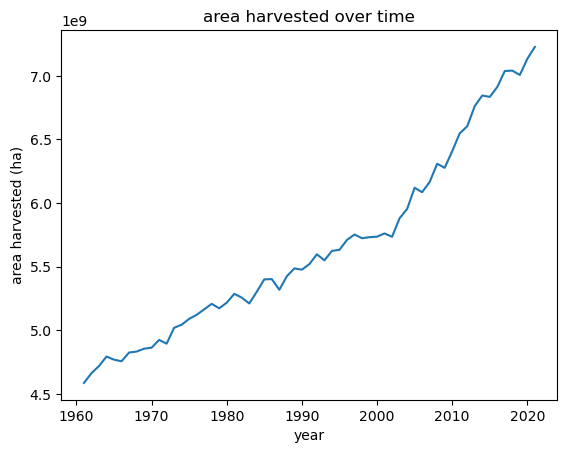

In [77]:
# plot as graph
x = selection.year.values
y = selection.area_harvested_in_ha.values
plt.plot(x, y)
plt.xlabel('year')
plt.ylabel('area harvested (ha)')
plt.title('area harvested over time')
plt.show()



----




In [78]:
df_population = fs.get_dataframe('SELECT * FROM fao_population')

In [79]:
# show unique values & counts
df_population.sort_values('year')['year'].value_counts(dropna=False)

year
2025    270
2041    270
2017    270
2016    270
2015    270
       ... 
1976    239
1975    239
1974    239
1973    239
1950    239
Name: count, Length: 151, dtype: int64

In [80]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39301 entries, 0 to 39300
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              39301 non-null  object 
 1   year              39301 non-null  int64  
 2   rural_population  25771 non-null  float64
 3   urban_population  25771 non-null  float64
 4   total_population  39200 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [81]:
df_population_world = df_population.query('area == "World" and year <= 2050')
df_population_world

,area,year,rural_population,urban_population,total_population
38655,World,1950,1.785372e+09,7.509029e+08,2.499322e+09
38656,World,1951,1.808749e+09,7.750677e+08,2.543130e+09
38657,World,1952,1.831302e+09,7.992825e+08,2.590271e+09
38658,World,1953,1.852940e+09,8.242900e+08,2.640279e+09
38659,World,1954,1.874123e+09,8.501791e+08,2.691979e+09
...,...,...,...,...,...
38751,World,2046,3.173284e+09,6.386625e+09,9.519191e+09
38752,World,2047,3.154118e+09,6.460428e+09,9.569298e+09
38753,World,2048,3.134182e+09,6.533912e+09,9.617774e+09
38754,World,2049,3.113492e+09,6.607034e+09,9.664516e+09


In [82]:
# from decimal import Decimal
# df_population_world.iloc[:, 3:5] = df_population_world.iloc[:, 3:5].apply(lambda x: x.apply(Decimal))
# df_population_world

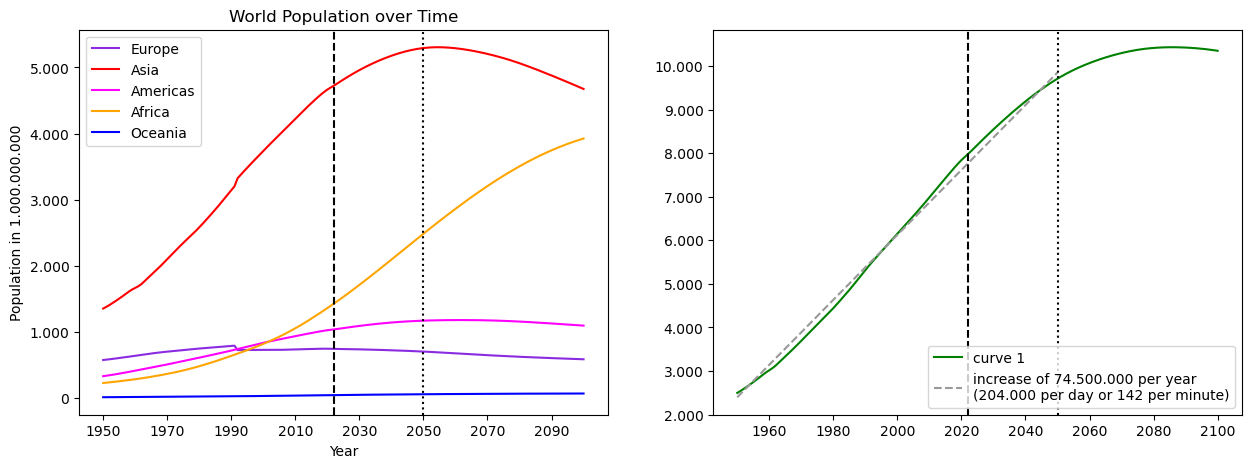

In [193]:
import matplotlib.ticker as ticker
import numpy as np

fig = plt.figure(figsize=(15,5))
p1 = fig.add_subplot(121)
p1.set_title('World Population over Time')
p1.set_xlabel('Year')
p1.set_ylabel('Population in 1.000.000.000')




year_limit = 2100

dict = {
      'Europe' : {
          'color': 'blueviolet'
        , 'label': 'Europe'
    }
    , 'Asia' : {
          'color': 'red'
        , 'label': 'Asia'
    }
    , 'Americas' : {
          'color': 'fuchsia'
        , 'label': 'Americas'
    }
    , 'Africa' : {
          'color': 'orange'
        , 'label': 'Africa'
    }
    , 'Oceania' : {
          'color': 'blue'
        , 'label': 'Oceania'
    }
}

for area, config in dict.items():
    p1.plot(
        df_population.query('area == "' + area + '" and year <= ' + str(year_limit) + '').year.values
        , df_population.query('area == "' + area + '" and year <= ' + str(year_limit) + '').total_population.values
        , label = config['label']
        , color = config['color']
        , linestyle="-"
    )

# using the first dict entry, format x values, show first & last value, also every 10th
x_values = df_population.query('area == "' + list(dict.keys())[0] + '" and year <= ' + str(year_limit) + '').year.values
plt.xticks(np.arange(min(x_values), max(x_values)+1, 20))

# format y axis in German locale, also dont print decimals
p1.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:,.0f}'.replace('.', 'X').replace(',', '.').replace('X', ','))
)

# separator for predictive data
p1.axvline(x=2022, color='black', linestyle="--")
p1.axvline(x=2050, color='black', linestyle=":")

p1.legend()


p2 = fig.add_subplot(122)


p2.plot(
      df_population.query('area == "World" and year <= ' + str(year_limit) + '').year.values
    , df_population.query('area == "World" and year <= ' + str(year_limit) + '').total_population.values
    , label = "curve 1"
    , color='green'
    , linestyle="-"
)
# 74500000 PER YEAR
p2.plot([1950, 2050], [2400000000, 9850000000], ls="--", c=".6", label='increase of 74.500.000 per year\n(204.000 per day or 142 per minute)')

# format y axis in German locale, also dont print decimals
p2.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:,.0f}'.replace('.', 'X').replace(',', '.').replace('X', ','))
)


# separator for predictive data
p2.axvline(x=2022, color='black', linestyle="--")
p2.axvline(x=2050, color='black', linestyle=":")


p2.legend(loc='lower right')

# p2.plot(world_population.Year.values, world_population.ratio_def_pop.values)#, label='Low Income Food Deficit Countries')
# p2.set_title("Proportion of World Population that Resides in LIFDCs' over Time")
# p2.set_xlabel('Year')
# p2.set_ylabel('Proportion of world population')
plt.show()